# EDA and Analysis of 2019 Lok sabha Elections


# About the Analysis

India is a country, divided into states and union territories, with a parliamentary system governed under the Constitution of India.The Election Commission a federal body, enacted under the provisions of the Constitution is responsible for monitoring and administering the elections all over India

The Analysis here is based on the election to Lok Sabha (The General Elections) for the year 2019 Members of Lok Sabha (House of the People) or the lower house of India's Parliament are elected by being voted upon by all adult citizens of India. Every adult citizen of India can vote only in their constituency. Candidates who win the Lok Sabha elections are called 'Member of Parliament' and hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers.

# Visual Representation of the Indian general election, 2019

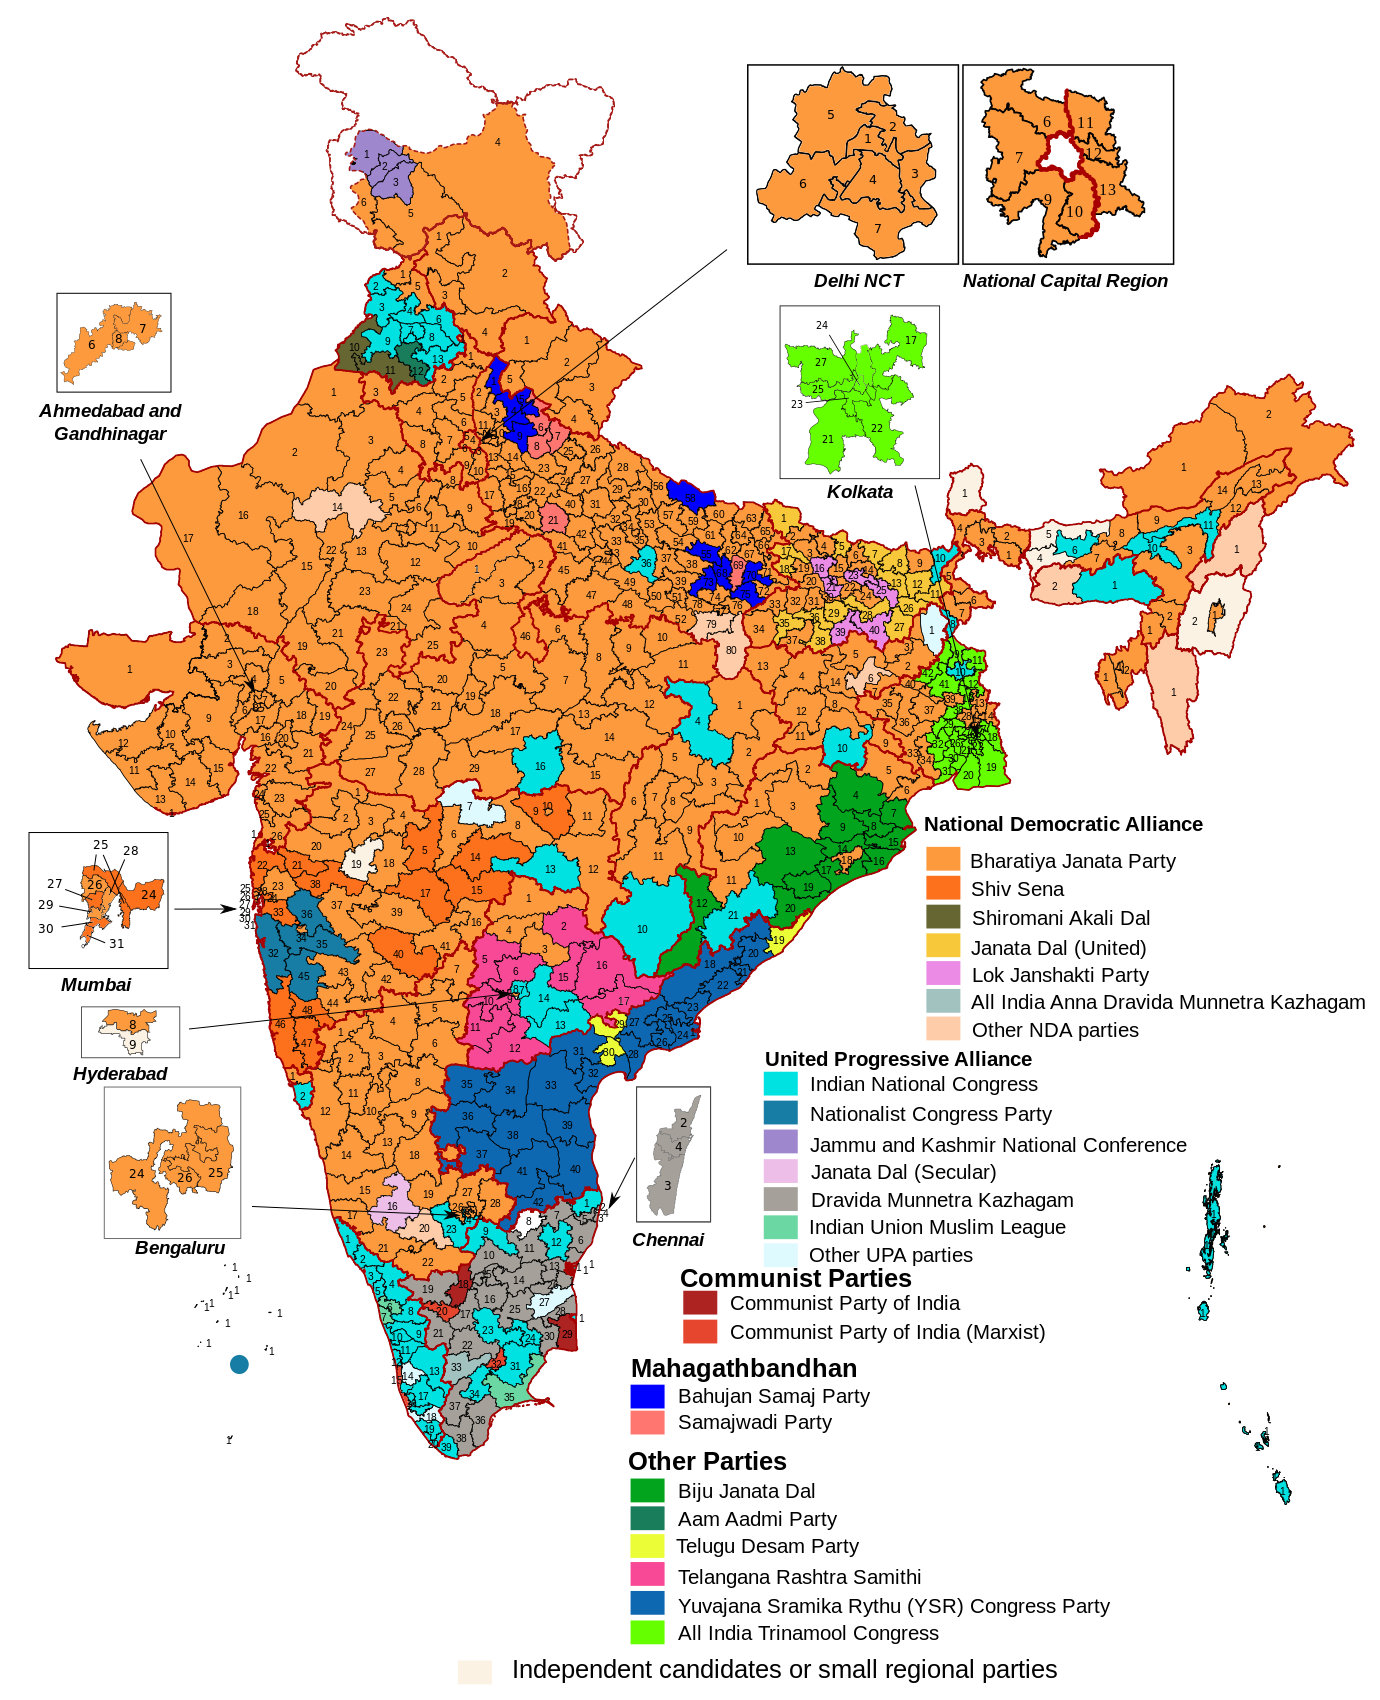

# Data preprocessing

---



In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import io
import plotly.express as px
from plotly.colors import n_colors

In [3]:
data_path = "/content/drive/MyDrive/Dataset/LS_2.0.csv"
data = pd.read_csv(data_path)
data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


The Attributes like "NAME" and "PARTY" have "NOTA" for missing or unknown values, they are convert

In [4]:
data.replace('NOTA',np.nan,inplace=True)

In [5]:
data.shape

(2263, 19)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2018 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2018 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

***Checking and cleaning null values***

In [7]:
data.isnull().sum()

STATE                                          0
CONSTITUENCY                                   0
NAME                                         245
WINNER                                         0
PARTY                                        245
SYMBOL                                       245
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

From missing data, observations need to be made to fill in the data.
In the Assests and liabilities attribute , they can be filled with 0 and the for the rest of attributes they are filled with "Unknown"



In [8]:
data = data.fillna({
    'ASSETS' : 0,
    'LIABILITIES' :0,
    'SYMBOL' : 'Unknown',
    'CRIMINAL\nCASES':'Unkown',
    'EDUCATION':'Unknown',
    'CATEGORY':'Unknown',
    'GENDER' : 'Unknown',
    'AGE':'Unknown',
})

In [9]:
#Check no data is lost
any(data.isna().sum())

True

In [10]:
data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NaN,0,NaN,Unknown,Unknown,Unkown,Unknown,Unknown,Unknown,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,115,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,Lotus,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,216,138947,9.271379,13.302678,1498666


Cleaning and Normalising **ASSETS** and **LIABILITIES**

In [11]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
data['ASSETS'] = data['ASSETS'].apply((value_cleaner))
data['LIABILITIES'] = data['LIABILITIES'].apply((value_cleaner))
data.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NaN,0,NaN,Unknown,Unknown,Unkown,Unknown,Unknown,Unknown,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [12]:
data['NAME'].isna().sum()

245

In [13]:
data.dropna(axis ='index', how = 'all',subset=['NAME'],
            inplace = True)
data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,YAVATMAL-WASHIM,Vaishali Sudhakar Yede,0,PHJSP,Whistle,FEMALE,0,28.0,GENERAL,10th Pass,1168500,9000,20563,57,20620,1.076097,1.755157,1916185
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,4890000,1020000,14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,1287851556,11535000,434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,903663001,0,427900,115,428015,28.559732,40.977823,1498666


In [14]:
print(any(data.isna().sum()))
data.shape

False


(2018, 19)

During data observation, we discovered some rows dont even any value for the attribute "NAME", which is a basic detail for any candidate.
So, these kind of rows can be dropped from the data

Renaming the columns

In [15]:
data.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES","GENERAL\nVOTES":"GENERAL VOTES","POSTAL\nVOTES":"POSTAL VOTES","TOTAL\nVOTES":"TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY":"OVER TOTAL ELECTORS IN CONSTITUENCY",
                     "OVER TOTAL VOTES POLLED \nIN CONSTITUENCY":"OVER TOTAL VOTES POLLED IN CONSTITUENCY"},inplace = True)

In [16]:
data

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2257,Maharashtra,YAVATMAL-WASHIM,Vaishali Sudhakar Yede,0,PHJSP,Whistle,FEMALE,0,28.0,GENERAL,10th Pass,1168500,9000,20563,57,20620,1.076097,1.755157,1916185
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,SHIP,MALE,0,43.0,GENERAL,Post Graduate,4890000,1020000,14661,25,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,Car,MALE,18,63.0,GENERAL,Graduate,1287851556,11535000,434066,178,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,Hand,MALE,0,49.0,GENERAL,Post Graduate,903663001,0,427900,115,428015,28.559732,40.977823,1498666


Cleaning the Education attribute


In [17]:
data["EDUCATION"].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available', 'Post Graduate\n'],
      dtype=object)

In [18]:
data["EDUCATION"].replace({'Post Graduate\n': 'Post Graduate'},inplace=True)
data['EDUCATION'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available'], dtype=object)

Updating the data types for analysis

In [19]:
data['ASSETS'] = data['ASSETS'].astype(int)
data['LIABILITIES'] = data['LIABILITIES'].astype(int)
data['CRIMINAL CASES'].replace({np.NaN:0})
data['CRIMINAL CASES'] = pd.to_numeric(data['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

In [20]:
data.dtypes

STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
SYMBOL                                      object
GENDER                                      object
CRIMINAL CASES                               int64
AGE                                         object
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                       int64
LIABILITIES                                  int64
GENERAL VOTES                                int64
POSTAL VOTES                                 int64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

# EDA (Exploratory Data Analysis)

---



# Analysis based on Winner Count

WINNERS : 539
DEFEATED :1479


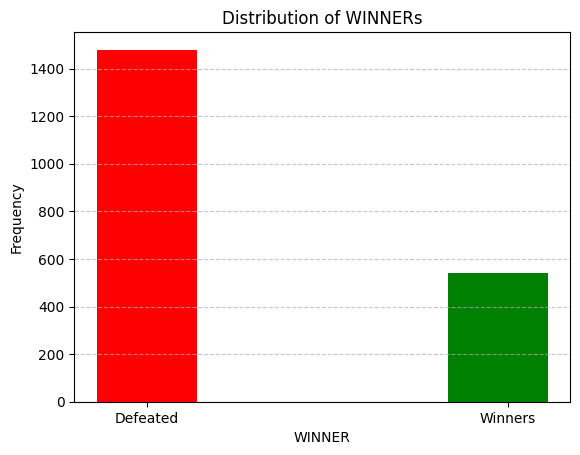

In [21]:
count_winners = ( data['WINNER'] == 1).sum()
count_losers = (data['WINNER'] == 0 ).sum()
print(f'WINNERS : {count_winners}')
print(f'DEFEATED :{count_losers}')
from matplotlib import pyplot as plt

winners = data[data['WINNER'] == 1]['WINNER']
losers = data[data['WINNER'] == 0]['WINNER']

# Plot winners and losers separately
plt.hist([losers, winners], bins=2, color=['red', 'green'], label=['Defeated', 'Winners'], rwidth=0.8)
plt.title('Distribution of WINNERs')
plt.xlabel('WINNER')
plt.ylabel('Frequency')
plt.xticks([0.15, 0.87], ['Defeated', 'Winners'])  # Set the x-axis labels appropriately
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for better readability



From the above representation we can observe that out of the total number of candidates only **539 candidates** were able to win

# Analysis based on gender

Number of Male Candidates : 1760
Number of Female Candidates: 258


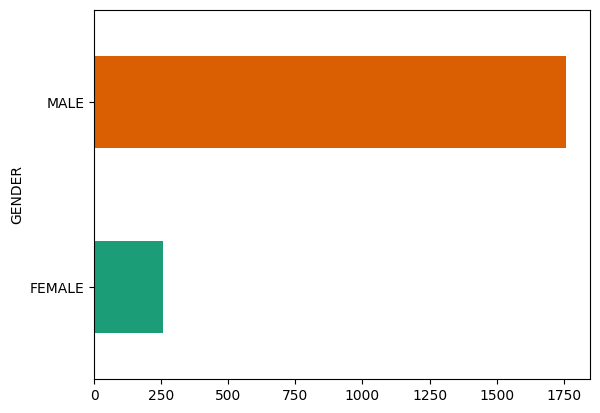

In [22]:

count_male = ( data['GENDER'] == 'MALE').sum()
count_female = (data['GENDER'] == 'FEMALE').sum()


from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('GENDER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)
print(f'Number of Male Candidates : {count_male}')
print(f'Number of Female Candidates: {count_female}')

We can see that about **87.21%** (1760 of 2018) of the overall candidates are MALE and **12.79%** (258 of 2018) are FEMALE

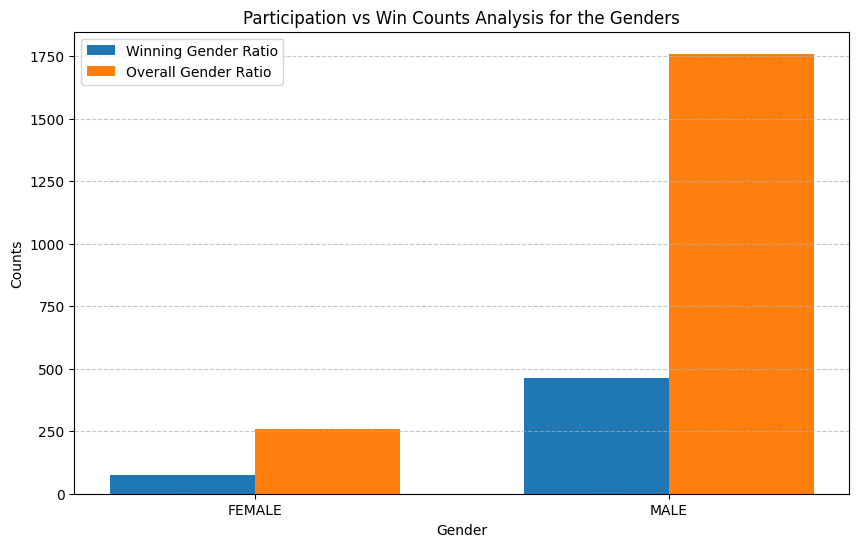

In [23]:
vote_gndr = data[data['PARTY'] != 'NOTA']

gndr_overall = vote_gndr.groupby('GENDER').apply(lambda x: x['NAME'].count()).reset_index(name='Counts')
gndr_overall['Category'] = 'Overall Gender Ratio'

# Filter winners and group them
winners = vote_gndr[vote_gndr['WINNER'] == 1]
gndr_winner = winners.groupby('GENDER').apply(lambda x: x['NAME'].count()).reset_index(name='Counts')
gndr_winner['Category'] = 'Winning Gender Ratio'

# Combine the overall and winning counts
gndr_overl_win = pd.concat([gndr_winner, gndr_overall])

categories = gndr_overl_win['Category'].unique()
genders = gndr_overl_win['GENDER'].unique()
bar_width = 0.35

counts_dict = {}
for category in categories:
    counts_dict[category] = gndr_overl_win[gndr_overl_win['Category'] == category].set_index('GENDER')['Counts']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

index = np.arange(len(genders))

for i, category in enumerate(categories):
    counts = counts_dict[category].reindex(genders).fillna(0)
    ax.bar(index + i * bar_width, counts, bar_width, label=category)

ax.set_xlabel('Gender')
ax.set_ylabel('Counts')
ax.set_title('Participation vs Win Counts Analysis for the Genders')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(genders)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display plot
plt.show()

Upon analysing the WINNERS accross the GENDERS, **14.1%**(76 of 463) are female candidates, whereas **85.9%** are male candidates. It can be clearly inferred that the gender ratio is unevenly distributed, from the above presentation

# Category level analysis

Number of ST candidates : 243
Number of SC candidates :383
Number of GEN candidates: 1392


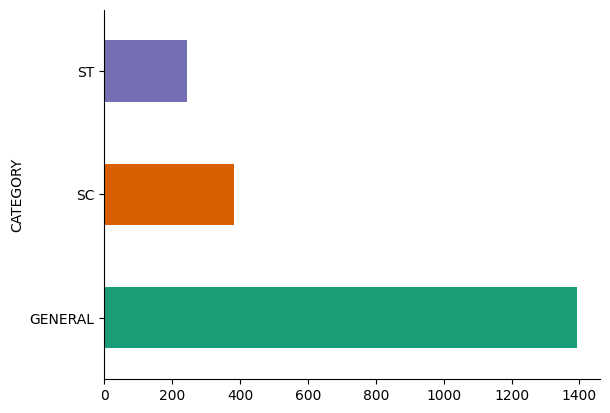

In [24]:

count_ST = ( data['CATEGORY'] == 'ST').sum()
count_SC = (data['CATEGORY'] == 'SC').sum()
count_gen = ( data['CATEGORY'] == 'GENERAL').sum()
print(f'Number of ST candidates : {count_ST}')
print(f'Number of SC candidates :{count_SC}')
print(f'Number of GEN candidates: {count_gen}')

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('CATEGORY').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Based on the category attribute from the above data, General candidates are the most numerous, followed by the SC candidates than ST candidates

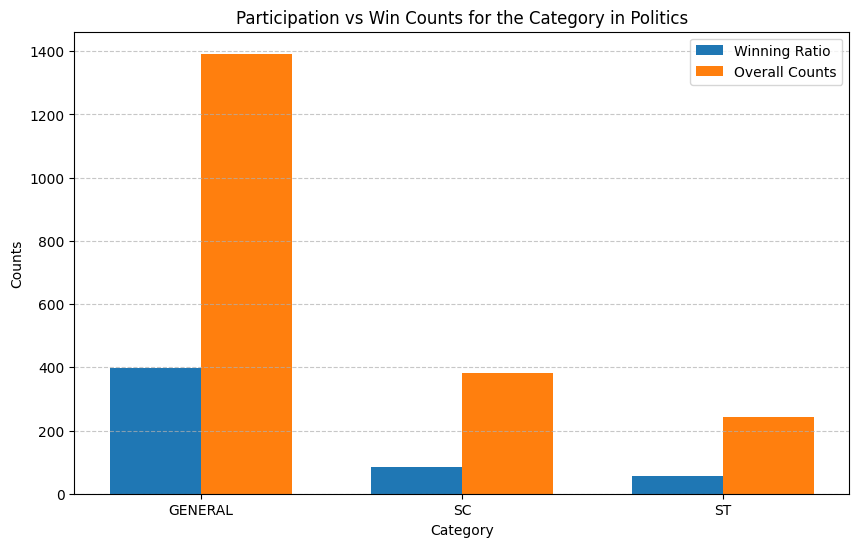

In [25]:
vote_cat = data[data['PARTY'] != 'NOTA']

# Group by category and count occurrences
cat_overall = vote_cat.groupby('CATEGORY').apply(lambda x: x['NAME'].count()).reset_index(name='Counts')
cat_overall['Category'] = 'Overall Counts'

# Filter winners and group by category
winners_cat = vote_cat[vote_cat['WINNER'] == 1]
cat_winner = winners_cat.groupby('CATEGORY').apply(lambda x: x['NAME'].count()).reset_index(name='Counts')
cat_winner['Category'] = 'Winning Ratio'

cat_overl_win = pd.concat([cat_winner, cat_overall])
# Prepare data for plotting
categories = cat_overl_win['Category'].unique()
category_labels = cat_overl_win['CATEGORY'].unique()
bar_width = 0.35  # Width of the bars

# Create a dictionary to store the counts
counts_dict = {}
for category in categories:
    counts_dict[category] = cat_overl_win[cat_overl_win['Category'] == category].set_index('CATEGORY')['Counts']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# X positions for bars
index = np.arange(len(category_labels))

for i, category in enumerate(categories):
    counts = counts_dict[category].reindex(category_labels).fillna(0)  # Ensure the counts align with the category labels
    ax.bar(index + i * bar_width, counts, bar_width, label=category)

ax.set_xlabel('Category')
ax.set_ylabel('Counts')
ax.set_title('Participation vs Win Counts for the Category in Politics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(category_labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# State and Union territory level analysis

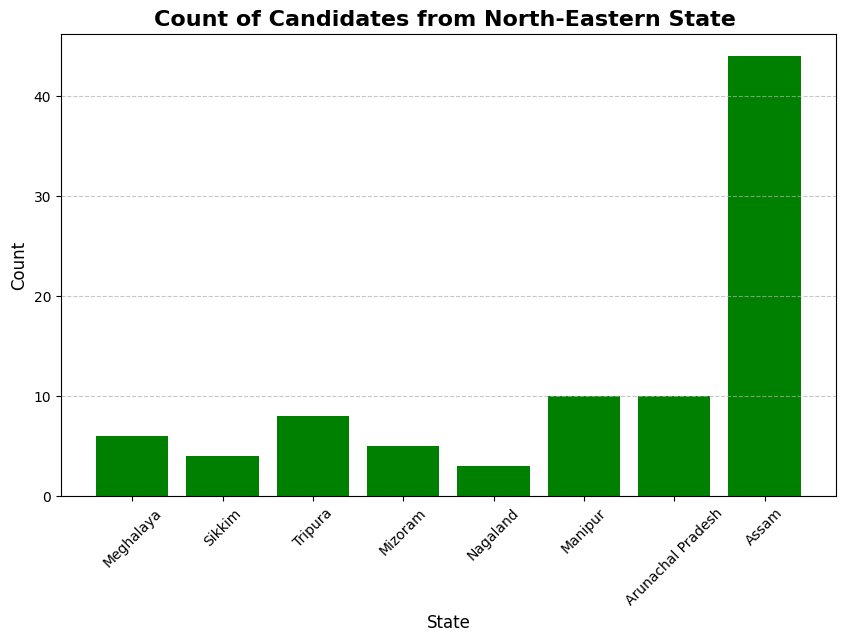

In [26]:
state_counts = {state: list(data['STATE']).count(state) for state in ["Meghalaya", "Sikkim", "Tripura", "Mizoram", "Nagaland", "Manipur", "Arunachal Pradesh","Assam"]}
plt.figure(figsize=(10, 6))
plt.bar(state_counts.keys(), state_counts.values(), color='green')

plt.title('Count of Candidates from North-Eastern State ', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

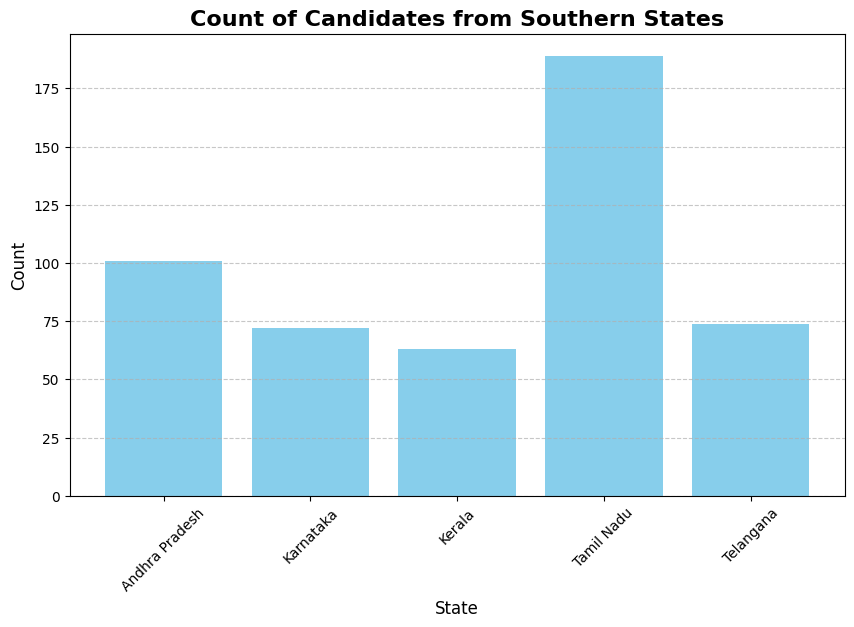

In [27]:
southern_states = ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Telangana"]

# Count the occurrences of each southern state
state_counts = {state: list(data['STATE']).count(state) for state in southern_states}

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(state_counts.keys(), state_counts.values(), color='skyblue')

plt.title('Count of Candidates from Southern States', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

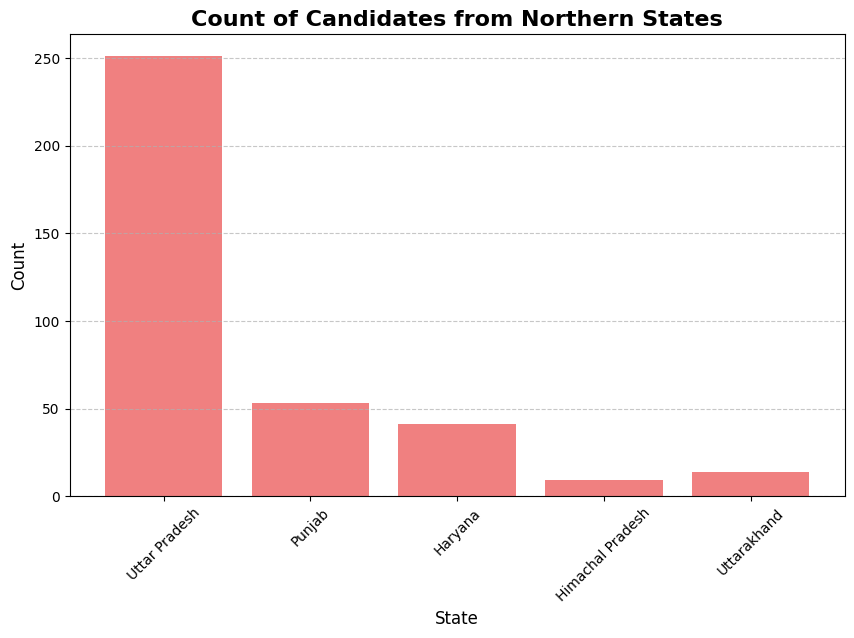

In [28]:
northern_states = ["Uttar Pradesh", "Punjab", "Haryana", "Himachal Pradesh", "Uttarakhand"]

# Count the occurrences of each northern state
northern_state_counts = {state: list(data['STATE']).count(state) for state in northern_states}

# Plot the data for northern states
plt.figure(figsize=(10, 6))
plt.bar(northern_state_counts.keys(), northern_state_counts.values(), color='lightcoral')

plt.title('Count of Candidates from Northern States', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

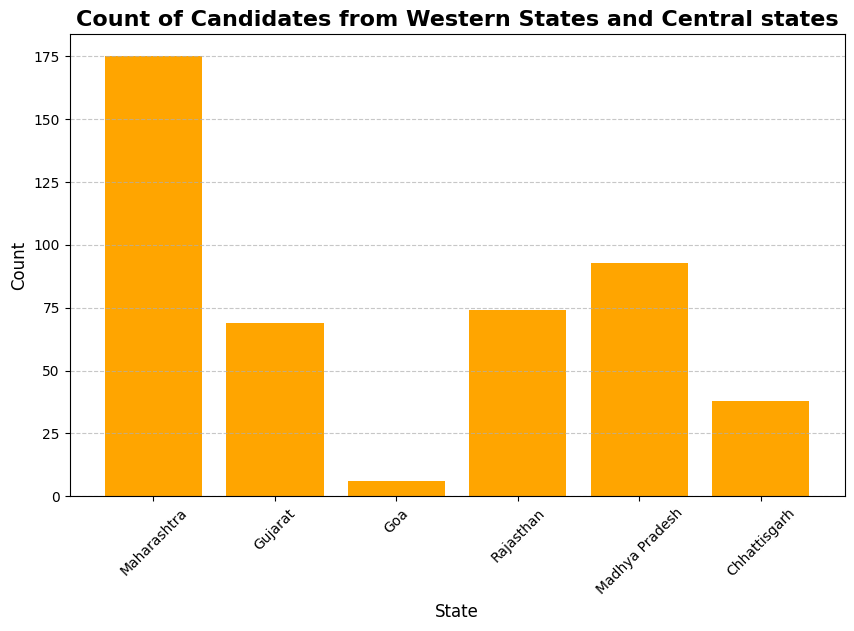

In [29]:
central_western_states = ["Maharashtra", "Gujarat", "Goa", "Rajasthan","Madhya Pradesh","Chhattisgarh"]

# Count the occurrences of each western state
central_western_state_counts = {state: list(data['STATE']).count(state) for state in central_western_states}


plt.figure(figsize=(10, 6))
plt.bar(central_western_state_counts.keys(), central_western_state_counts.values(), color='orange')

plt.title('Count of Candidates from Western States and Central states', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

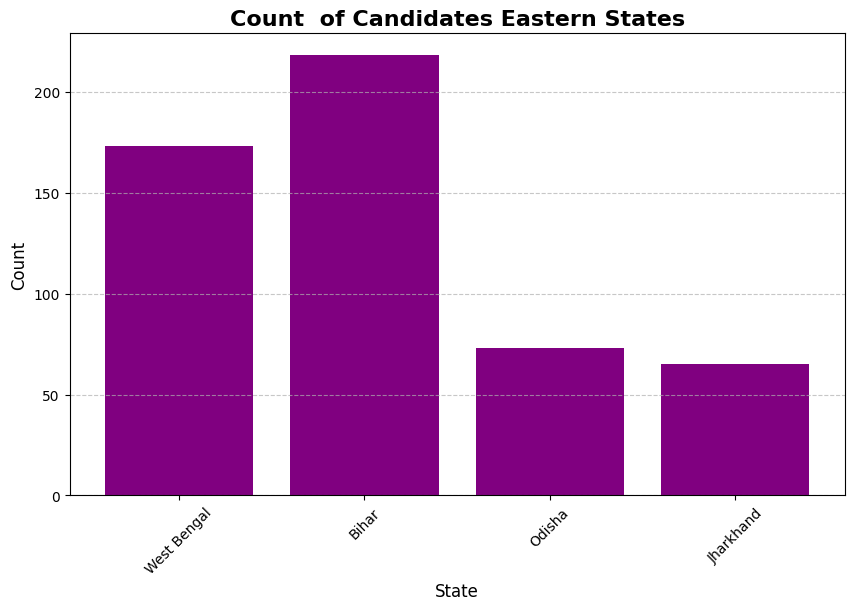

In [30]:
eastern_states = ["West Bengal", "Bihar", "Odisha", "Jharkhand"]

# Count the occurrences of each eastern state
eastern_state_counts = {state: list(data['STATE']).count(state) for state in eastern_states}

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(eastern_state_counts.keys(), eastern_state_counts.values(), color='purple')

plt.title('Count  of Candidates Eastern States', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

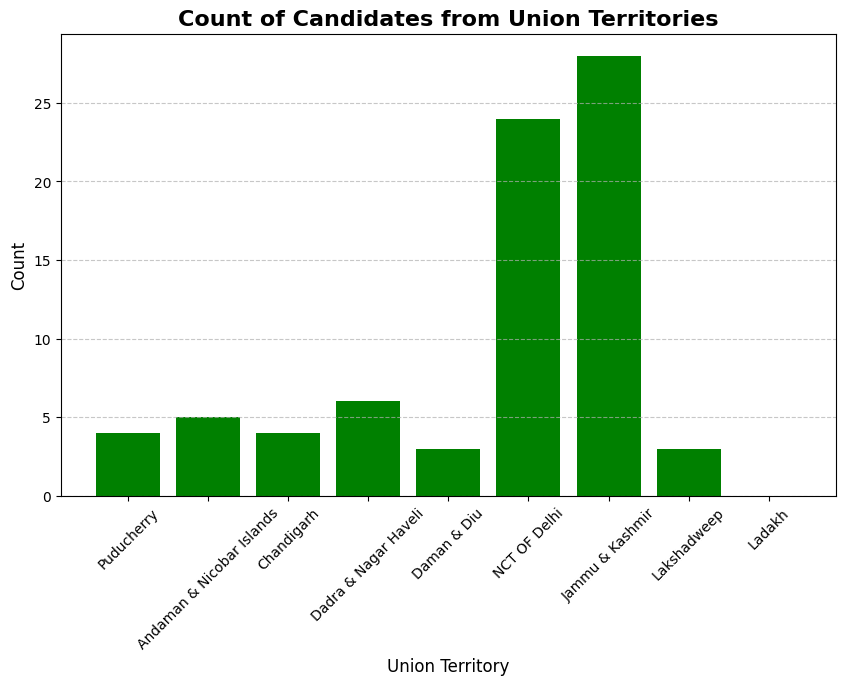

In [31]:
ut =["Puducherry","Andaman & Nicobar Islands","Chandigarh","Dadra & Nagar Haveli","Daman & Diu","NCT OF Delhi","Jammu & Kashmir" ,"Lakshadweep","Puducherry","Ladakh"]
# Count the occurrences of each remaining state and union territory
ut_counts = {state: list(data['STATE']).count(state) for state in ut}

# Plot for union territories
plt.figure(figsize=(10, 6))
plt.bar(ut_counts.keys(), ut_counts.values(), color='green')

plt.title('Count of Candidates from Union Territories', fontsize=16, fontweight='bold')
plt.xlabel('Union Territory', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Show the plot
plt.show()

There is no visible plot for **Ladakh** because there is no registered candidate from **Ladakh** according to the data


# Party-Wise Analysis


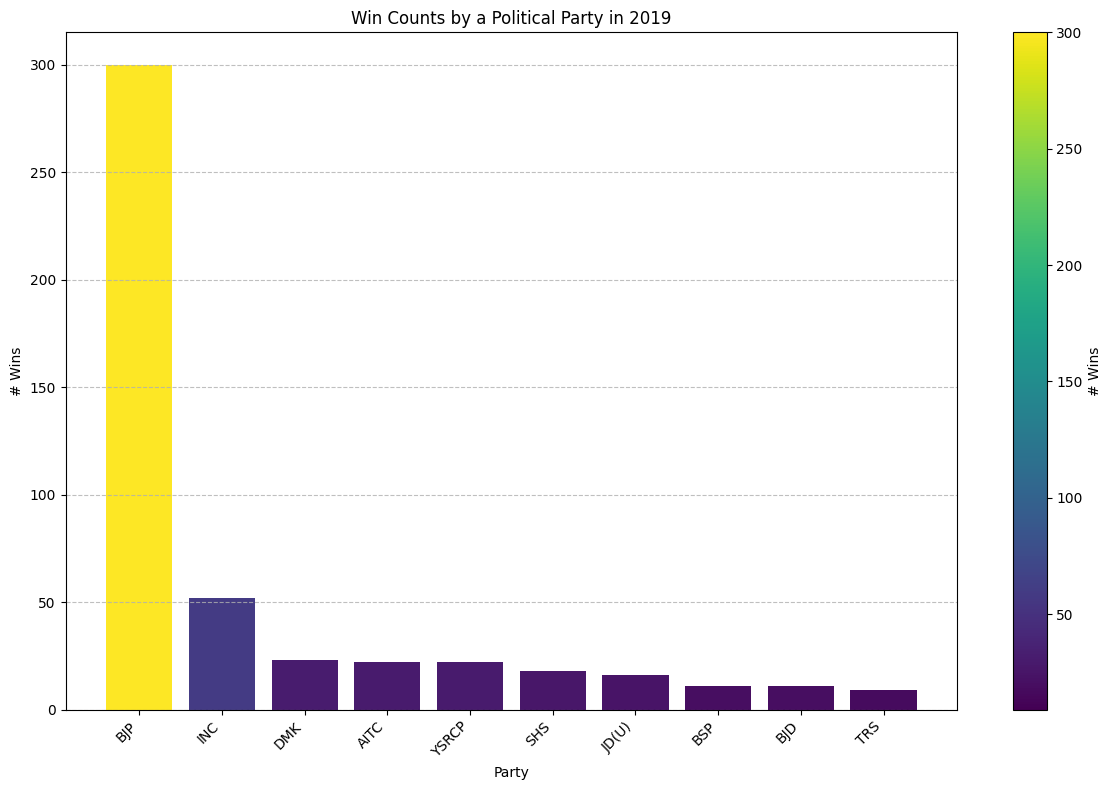

In [32]:
part_win = data.groupby('PARTY')['WINNER'].sum().reset_index(name='# Wins')
part_win.sort_values(by='# Wins',ascending = False, inplace=True)

# Select the top 15 parties by number of wins
top_part_win = part_win.head(10)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(top_part_win['PARTY'], top_part_win['# Wins'], color=plt.cm.viridis(top_part_win['# Wins'] / top_part_win['# Wins'].max()))

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=top_part_win['# Wins'].min(), vmax=top_part_win['# Wins'].max()))
sm.set_array([])
fig.colorbar(sm, ax=ax, orientation='vertical', label='# Wins')

plt.xlabel('Party')
plt.ylabel('# Wins')
plt.title('Win Counts by a Political Party in 2019')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Display plot
plt.tight_layout()
plt.show()

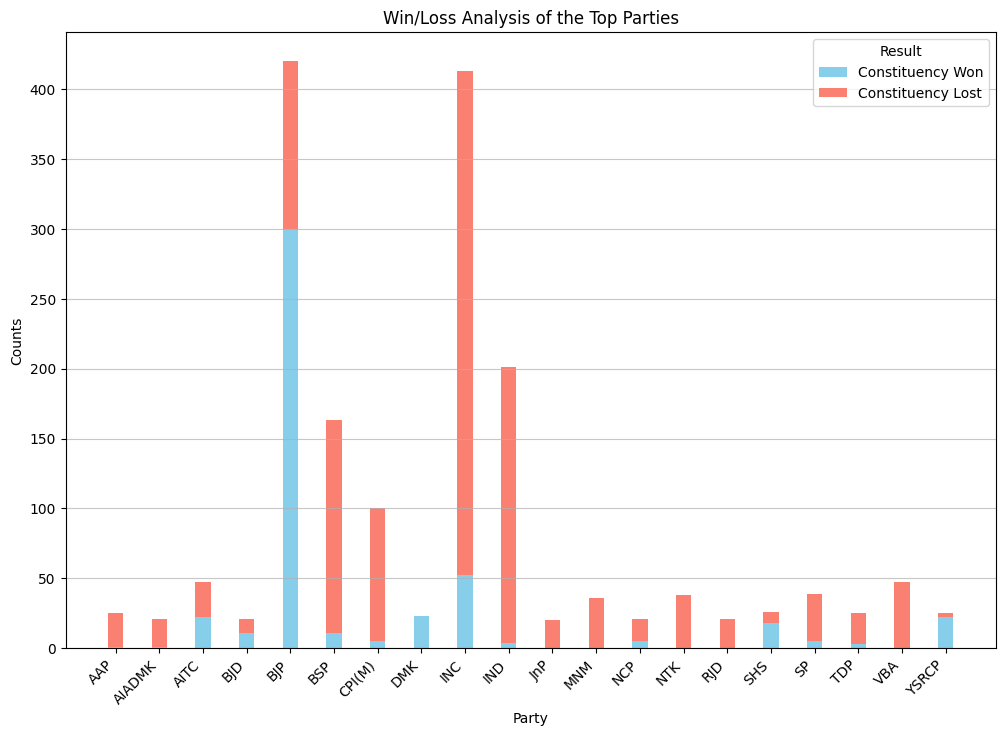

In [33]:
party_results = data.groupby('PARTY')['WINNER'].agg(['sum', 'count']).reset_index()
party_results.columns = ['Party', 'Wins', 'Constituency']
party_results['Losses'] = party_results['Constituency'] - party_results['Wins']

# Data for wins
party_wins = party_results[['Party', 'Wins']].copy()
party_wins['Verdict'] = 'Constituency Won'
party_wins.columns = ['Party', 'Counts', 'Verdict']

# Data for losses
party_losses = party_results[['Party', 'Losses']].copy()
party_losses['Verdict'] = 'Constituency Lost'
party_losses.columns = ['Party', 'Counts', 'Verdict']

party_win_loss = pd.concat([party_wins, party_losses])

# Select the top parties
top_parties = party_results.nlargest(20, 'Constituency')['Party']
party_win_loss_top = party_win_loss[party_win_loss['Party'].isin(top_parties)]

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.35
parties = party_win_loss_top['Party'].unique()
x = range(len(parties))

won_counts = party_win_loss_top[party_win_loss_top['Verdict'] == 'Constituency Won']['Counts'].values
lost_counts = party_win_loss_top[party_win_loss_top['Verdict'] == 'Constituency Lost']['Counts'].values

ax.bar(x, won_counts, width, label='Constituency Won', color='skyblue')
ax.bar(x, lost_counts, width, bottom=won_counts, label='Constituency Lost', color='salmon')

# Customize the plot
ax.set_xlabel('Party')
ax.set_ylabel('Counts')
ax.set_title('Win/Loss Analysis of the Top Parties')
ax.set_xticks(x)
ax.set_xticklabels(parties, rotation=45, ha='right')
ax.legend(title='Result')
ax.grid(axis='y', linestyle='-', alpha=0.7)

# Show the plot
plt.show()

**Observation** : As seen in the above graph, in the 2019 elections parties like BJP, SHS, DMK or YSRCP won most of the constituencies in which they contested. And, as for the rest their loss is more than they won

# Education-based Analysis

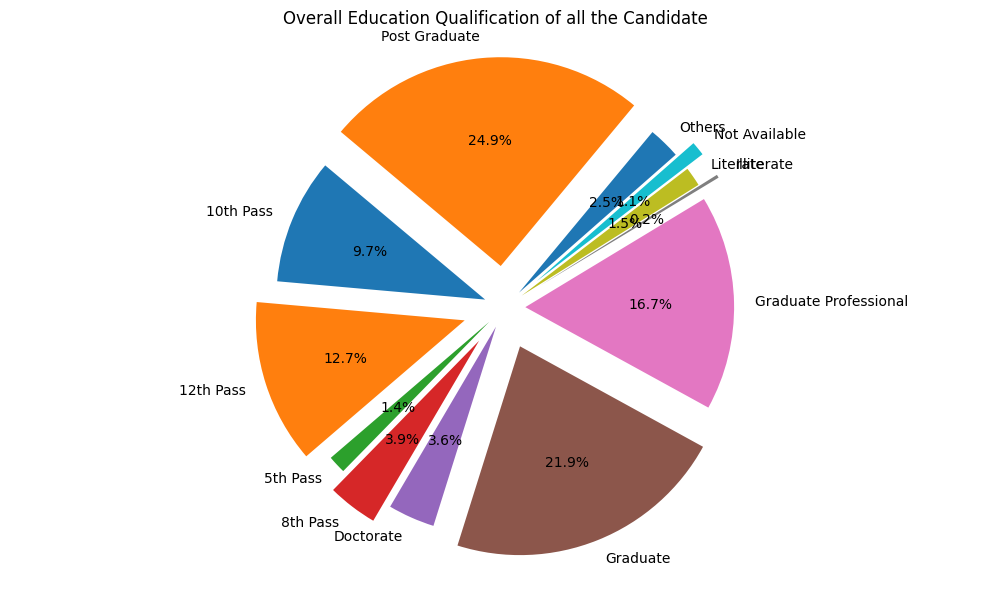

In [34]:
ed_valid = data[data['PARTY'] != "NOTA"]
ed_cnt = ed_valid.groupby('EDUCATION').size().reset_index(name='Counts')

# Plot overall education qualification of all the nominees
fig, ax = plt.subplots(figsize=(10, 6))
wedges, txt, auto_txt = ax.pie(
    ed_cnt['Counts'], labels=ed_cnt['EDUCATION'], autopct='%1.1f%%', startangle=140,
    explode=[0.1 if i % 2 == 0 else 0.2 for i in range(len(ed_cnt))]
)
ax.set_title('Overall Education Qualification of all the Candidate')

plt.setp(auto_txt, size=10, color="black")
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

We can see that about 67.1% of the overall candidates who were
part of the election are atleast Graduates

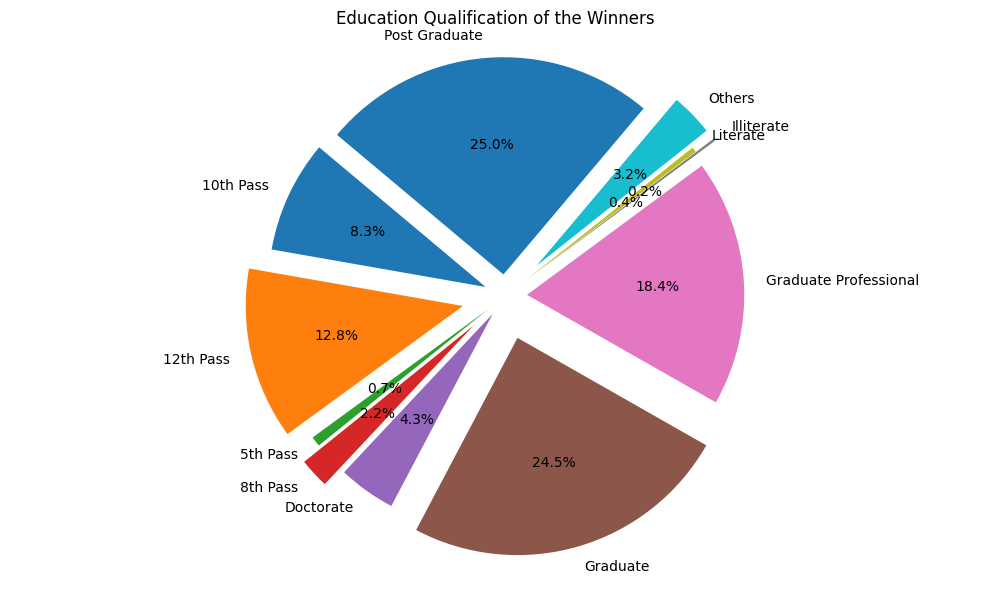

In [35]:
# Filter winners and group by 'EDUCATION'
ed_won = ed_valid[ed_valid['WINNER'] == 1]
ed_win = ed_won.groupby('EDUCATION').size().reset_index(name='Counts')

# Plot education qualification of the winners
fig2, ax2 = plt.subplots(figsize=(10, 6))
wdgs2, txt2, auto_txt2 = ax2.pie(
    ed_win['Counts'], labels=ed_win['EDUCATION'], autopct='%1.1f%%', startangle=140,
    explode=[0.1 if i % 2 == 0 else 0.2 for i in range(len(ed_win))]
)
ax2.set_title('Education Qualification of the Winners')
plt.setp(auto_txt2, size=10, color="black")
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

Among the total number of Candidates the number of educated people contesting in the election was **67.1%** are educated and from these about **72.2%** of them are winners which is a positive sign as they can largly provide towards the countries development. Even though the number of educated candidates among winners is high, but still about **28%** of the candidates have no professional education.

Thus , **EDUCATION** can be considered an important factor and should be kept in mind while voting!

# Dependence of Age

Male Candidates:AGE       60
GENDER    60
Counts    60
dtype: int64
Female Candidates:AGE       50
GENDER    50
Counts    50
dtype: int64


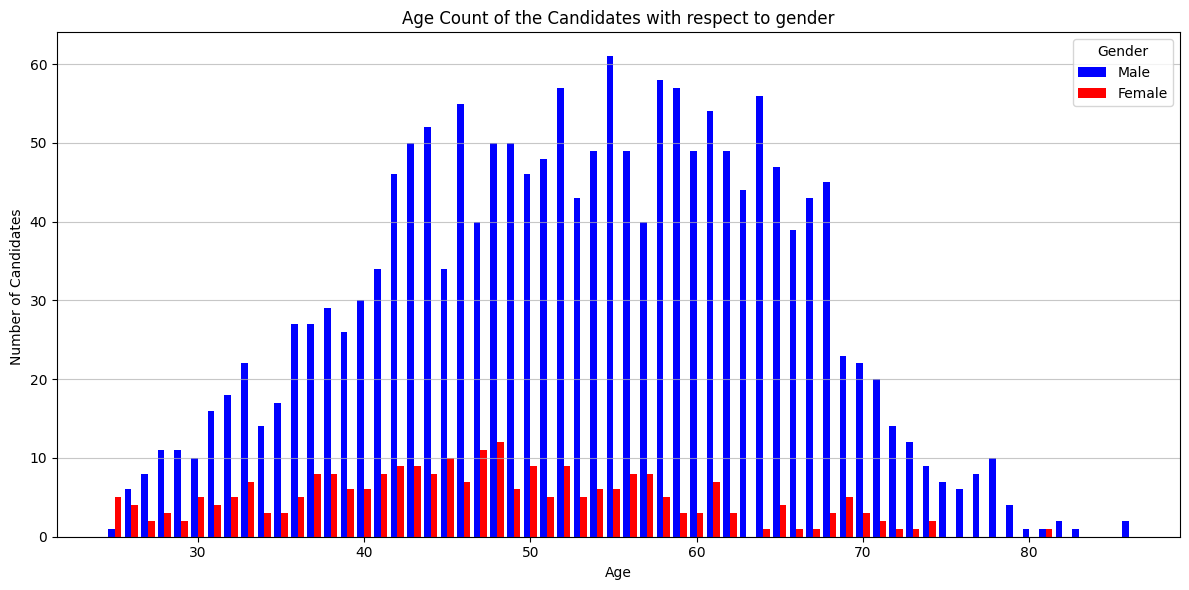

In [36]:
ed_valid = data[data['PARTY'] !='NOTA']
age_count = ed_valid.groupby(['AGE','GENDER']).apply(lambda x:x['NAME'].count()).reset_index(name='Counts')

males = age_count[age_count['GENDER'] == 'MALE']
print(f'Male Candidates:{males.count()}')
females = age_count[age_count['GENDER'] == 'FEMALE']
print(f'Female Candidates:{females.count()}')
fig, ax = plt.subplots(figsize=(12,6))
#Plot of males
ax.bar(males['AGE'] - 0.2, males['Counts'], width=0.4, label='Male', color='blue', align='center')
#Plot of females
ax.bar(females['AGE'] + 0.2, females['Counts'], width=0.4, label='Female', color='red', align='center')

ax.set_xlabel('Age')
ax.set_ylabel('Number of Candidates ')
ax.set_title('Age Count of the Candidates with respect to gender')
ax.legend (title='Gender')
ax.grid(axis='y', linestyle='-',alpha=0.7)
plt.tight_layout()
plt.show()

Most of the female candidates are of the age **45-50**, where as for the male candidates the range if from **50-60**

# Criminal Background analysis

In [73]:
crim_cnt=ed_valid.groupby('CRIMINAL CASES').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
fig = px.histogram(crim_cnt, x='CRIMINAL CASES',y='Counts')
fig.update_layout(title_text='Criminal Cases Counts Distribution among the politicians',template='plotly_white')
fig.show()

From the above plot it can be observed , many candidates have a criminal background.But all these cases may not be genuine and it should be kept in mind while voting in order to choose the right candidate

# Prediction

---



In [66]:
vote_df=data[data['PARTY']!='NOTA']
vote_df['GENDER'].replace({'MALE':1,'FEMALE':2},inplace=True)
vote_df['CATEGORY'].replace({'GENERAL':1,'SC':2,'ST':3},inplace=True)
i=1
parties_dict={}
for j in vote_df['PARTY']:
    if j in parties_dict:
        continue
    else:
        parties_dict[j]=i
        i+=1
vote_df['PARTY'].replace(parties_dict,inplace=True)
a=1
edu_dict={}
for b in vote_df['EDUCATION']:
    if b in edu_dict:
        continue
    else:
        edu_dict[b]=a
        a+=1
vote_df['EDUCATION'].replace(edu_dict,inplace=True)
df1 = vote_df[['STATE','CONSTITUENCY','WINNER','PARTY','SYMBOL','GENDER','CRIMINAL CASES','CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS','LIABILITIES']]
num_cols = ['PARTY','EDUCATION','CRIMINAL CASES','TOTAL VOTES','TOTAL ELECTORS','ASSETS','CATEGORY','LIABILITIES','GENDER']
dataset = pd.get_dummies(df1)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
scaling_columns = num_cols
dataset[scaling_columns] = standardScaler.fit_transform(dataset[scaling_columns])
dataset.head()

,WINNER,PARTY,GENDER,CRIMINAL CASES,CATEGORY,EDUCATION,TOTAL VOTES,TOTAL ELECTORS,ASSETS,LIABILITIES,...,SYMBOL_Tiller,SYMBOL_Tractor Chalata Kisan,SYMBOL_Triangle,SYMBOL_Truck,SYMBOL_Two Leaves,SYMBOL_Tyres,SYMBOL_Umbrella,SYMBOL_Walking Stick,SYMBOL_Water Melon,SYMBOL_Whistle
0,1,-0.628979,-0.382872,6.620242,2.251127,-1.242514,0.332957,-0.538876,-0.311731,-0.218126,...,False,False,False,False,False,False,False,False,False,False
1,0,-0.583879,-0.382872,-0.190426,2.251127,-0.872637,0.103781,-0.538876,-0.274420,-0.211243,...,False,False,False,False,False,False,False,False,False,False
2,0,-0.538780,-0.382872,0.202498,2.251127,-1.242514,0.085873,-0.538876,-0.230717,-0.049632,...,False,False,False,False,False,False,False,False,False,False
4,1,-0.628979,-0.382872,0.464446,0.816718,-0.502761,1.387657,0.876978,-0.139047,-0.124477,...,False,False,False,False,False,False,False,False,False,False
5,0,-0.493681,-0.382872,-0.190426,0.816718,-0.872637,0.559766,0.876978,0.005336,0.028103,...,False,False,False,False,False,False,False,False,False,False


# Model

In [68]:
from  sklearn.utils import resample
df_not_winner = dataset[dataset.WINNER == 0]
df_winner = dataset[dataset.WINNER == 1]
df_winner_upsampled = resample(df_winner, replace = True,n_samples = 1452, random_state = 0)
df_total_upsampled = pd.concat([df_not_winner, df_winner_upsampled])
df_total_upsampled.WINNER.value_counts()
y = df_total_upsampled['WINNER']
X = df_total_upsampled.drop(['WINNER'], axis = 1)
rf_scores = []

# Accuracy of the model

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rand_forest = RandomForestClassifier(n_estimators=38, random_state = 0)
score = cross_val_score(rand_forest,X,y,cv=10)
print(f'Accuracy % :{score.mean()*100}')

Accuracy % :96.0422325926958


An accuracy of **96.042 %** with the model, and it can be further improved inorder to increase the **accuracy**

# Summary
  After analysing this data regarding the 2019 Lok Sabha elections, the following things can be inferred :


*   In the 2019 elections, education can be considered as an important factor which influenced the choice of Candidates for the voters.

*   According the data, the **BJP(Bharatiya Janta Party)** has  won the maximum number of seats all over **India** .

*   During the elections, A large percentage of the candidates were Males (87.21%) and only **14.1%** were Females. This may a case of concern and new policies or inciatives should be given by the Government to encourage more participation.


*   It was also observed that a the average age of a large population of the candidates were quite high. Encouraging the younger politicians to contest may be advantageous; Even though it will be wrong to conclude that older candidates will not be able to perform their duty.

*   Criminal Record is a serious apprehension, as candidates who are elected are indirectly the representatives of the people.Thus, it is an important factor to keep in mind so that the elected politicians are respectable and accountable for their actions.

*  According to our prediction , we got an accuracy of 96.042% in estimating the winning candidates using the "Random Forest Classifier " model.







